Решенията се предават в раздела Контролна работа 1 на Moodle до **23:59 ч. на 15.04.2025 г.** в .ipynb и в .pdf формат.

# Задача 1. Clustering

В раздела на контролната работа в Moodle се намира .zip файл с този notebook и файла `cust.csv`, който трябва да заредите, да премахнете колоната `CUST_ID` и спрямо него да приложите алгоритмите за клъстериране, посочени по-долу, използвайки `sklearn`.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/cust.csv')

if 'CUST_ID' in df.columns:
    df.drop(columns=['CUST_ID'], inplace=True)

print("Първите 5 реда от данните:")
print(df.head())

Първите 5 реда от данните:
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.

### KMeans

Чрез този метод изчислете сбора от вторите степени на разстоянията от всяка точка на клъстър до нейния център (в `sklearn` това се дава от `inertia_` ), и променяйки броя на клъстерите визуализирайте резултатите на графика и определете оптималния брой клъстери чрез този метод.

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

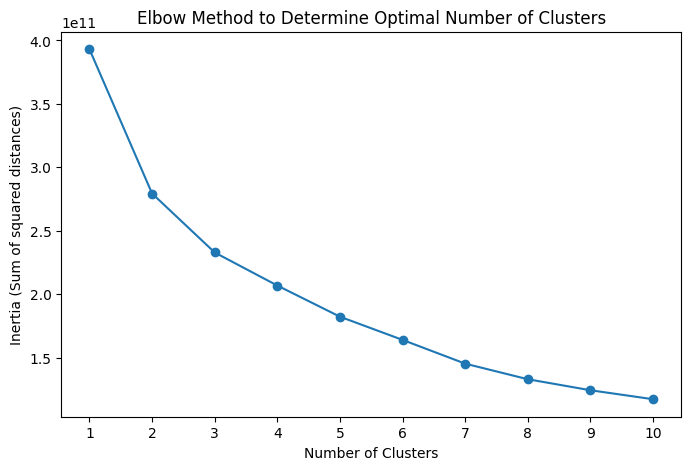

In [ ]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric = df_numeric.fillna(df_numeric.mean())

ks = range(1, 11)
inertia_values = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_numeric)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(ks, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xticks(ks)
plt.show()

### Агломеративен алгоритъм

Чрез `scipy.cluster.hierarchy.linkage`, `scipy.spatial.distance.pdist` и `matplotlib` да се начертае дендрограма на данните чрез алгомеративния алгоритъм `linkage`

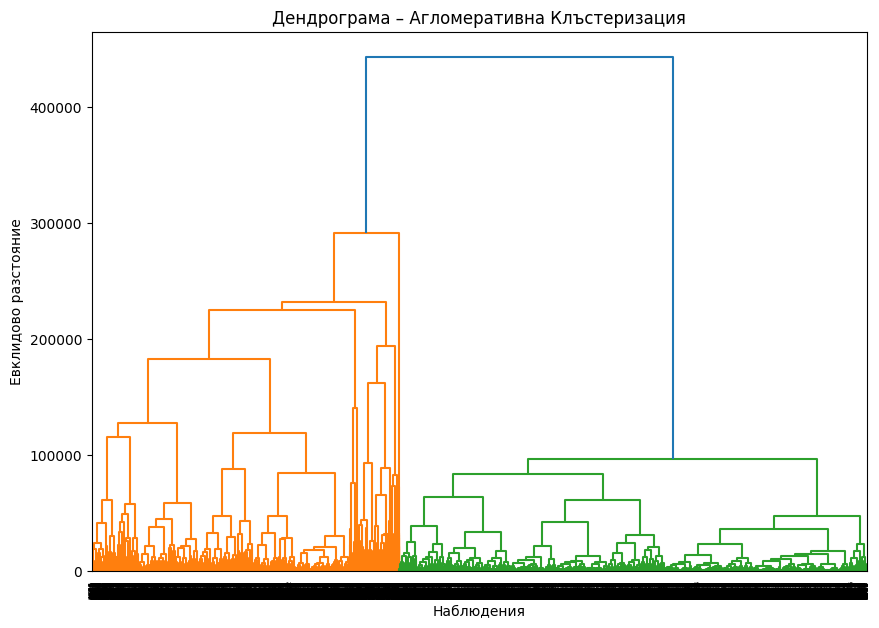

In [ ]:
import scipy.cluster.hierarchy as sch

linked = sch.linkage(df_numeric, method='ward')

plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
               orientation='top',
               distance_sort='descending',
               show_leaf_counts=True)

plt.xlabel('Наблюдения')
plt.ylabel('Евклидово разстояние')
plt.title('Дендрограма – Агломеративна Клъстеризация')
plt.show()


### Silhouette Score (по желание)

Като се използват прогнозни стойности на основата на `sklearn.cluster.AgglomerativeClustering`, както и оригиналните данни да се изобразят в графика стойностите на "silhouette score" (`sklearn.metrics.silhouette_score`), когато се прилагат последователно модели с между 2 и 10 клъстера

## DBSCAN

Използвайки `sklearn.cluster.DBSCAN` и различни стойности на ɛ (по избор), определете колко клъстера се получават

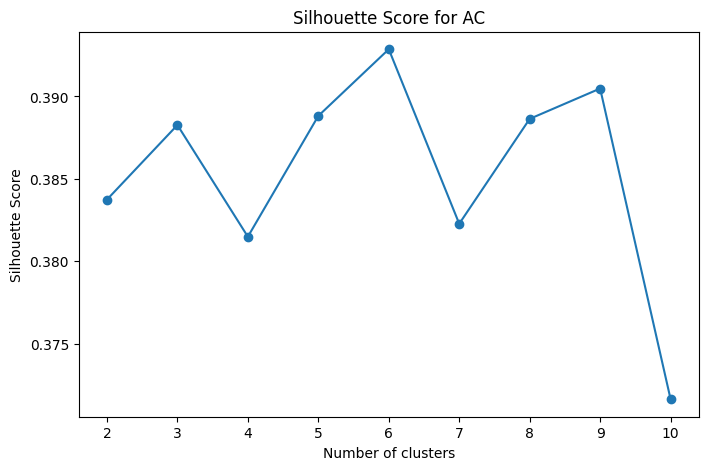

Silhouette Scores for many clusters:
Number of clusters = 2: Silhouette Score = 0.3837
Number of clusters = 3: Silhouette Score = 0.3883
Number of clusters = 4: Silhouette Score = 0.3815
Number of clusters = 5: Silhouette Score = 0.3888
Number of clusters = 6: Silhouette Score = 0.3929
Number of clusters = 7: Silhouette Score = 0.3823
Number of clusters = 8: Silhouette Score = 0.3886
Number of clusters = 9: Silhouette Score = 0.3905
Number of clusters = 10: Silhouette Score = 0.3716


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

silhouette_scores = {}

for n_clusters in range(2, 11):
    agg_clust = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agg_clust.fit_predict(df_numeric)
    score = silhouette_score(df_numeric, cluster_labels)
    silhouette_scores[n_clusters] = score

plt.figure(figsize=(8, 5))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for AC')
plt.xticks(range(2, 11))
plt.show()

print("Silhouette Scores for many clusters:")
for n_clusters, score in silhouette_scores.items():
    print(f"Number of clusters = {n_clusters}: Silhouette Score = {score:.4f}")


# Задача 2. Дървета


## a)

Използвайте [тези данни](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) за класификация и направете възможно най-добрия модел. Избирайте между Decision tree, bagging и boosting алгоритми. Направете кръстосана валидация и намерете най-добрите възможни хиперпараметри.

Накрая вижте как се справя избраният от вас модел върху тестови данни.

## б)

Напишете Random Forest за класификация. Направете следните стъпки:




*   Вземете случайна извадка от редовете (bootstrap sample).
*   Вземете случайна извадка от колоните (използваме само част от променливите).
*   Използвайте random_seed на numpy в началото на notebook-а, за да могат резултатите ви да бъдат репликирани.
*   Тренирайте DecisionTreeClassifier върху съответната извадка. Напишете свой собствен DecisionTreeClassifier, който прави разделението базирано на ентропия.
*   Запазете вече тренираното дърво и направете предходните стъпки наново.
*   Добавете хиперпараметър n_estimators, който да определя броя на дървета за трениране.
*   Тренираният Random forest трябва да може да прави предсказания върху нови данни.
*   Сравнете вашето решение с това на RandomForrestClassifier на sklearn върху някой от dataset-овете на sklearn (по избор).